# An Investigation into How Personality Characteristics Affect Self Reported Feelings of Depression

## Introduction

Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. Introduction text here. 

## Methods & Results

### Data Wrangling

We begin by importing the required libraries that we will be using for our analysis.

In [54]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




The data set is in csv format and can be read in using the read_csv function. We will assign the raw data to the label dass_data.

In [7]:
# Reading in the data
url <- "https://raw.githubusercontent.com/FionaC124/group-one-project/main/dass_data.csv?token=GHSAT0AAAAAABQGS3PIQOXUVU4V7TBTZOPGYREEL7A"
dass_data <- read_csv(url)

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  major = col_character()
)

See spec(...) for full column specifications.



To ensure that the data was read in correctly, we will use the nrow(), names(), and head() functions to preview the number of observations, column headers, and first six rows.

In [12]:
#Number of rows in the data
nrow(dass_data)

# names in the raw data
names(dass_data)

#Preview the data
head(dass_data)

[1] 39775

[1] "Q1A"                   "Q1I"                   "Q1E"                  
  [4] "Q2A"                   "Q2I"                   "Q2E"                  
  [7] "Q3A"                   "Q3I"                   "Q3E"                  
 [10] "Q4A"                   "Q4I"                   "Q4E"                  
 [13] "Q5A"                   "Q5I"                   "Q5E"                  
 [16] "Q6A"                   "Q6I"                   "Q6E"                  
 [19] "Q7A"                   "Q7I"                   "Q7E"                  
 [22] "Q8A"                   "Q8I"                   "Q8E"                  
 [25] "Q9A"                   "Q9I"                   "Q9E"                  
 [28] "Q10A"                  "Q10I"                  "Q10E"                 
 [31] "Q11A"                  "Q11I"                  "Q11E"                 
 [34] "Q12A"                  "Q12I"                  "Q12E"                 
 [37] "Q13A"                  "Q13I"                  "Q13E"                 
 [40] "Q14A"                  "Q14I"                  "Q14E"                 
 [43] "Q15A"                  "Q15I"                  "Q15E"                 
 [46] "Q16A"                  "Q16I"                  "Q16E"                 
 [49] "Q17A"                  "Q17I"                  "Q17E"                 
 [52] "Q18A"                  "Q18I"                  "Q18E"                 
 [55] "Q19A"                  "Q19I"                  "Q19E"                 
 [58] "Q20A"                  "Q20I"                  "Q20E"                 
 [61] "Q21A"                  "Q21I"                  "Q21E"                 
 [64] "Q22A"                  "Q22I"                  "Q22E"                 
 [67] "Q23A"                  "Q23I"                  "Q23E"                 
 [70] "Q24A"                  "Q24I"                  "Q24E"                 
 [73] "Q25A"                  "Q25I"                  "Q25E"                 
 [76] "Q26A"                  "Q26I"                  "Q26E"                 
 [79] "Q27A"                  "Q27I"                  "Q27E"                 
 [82] "Q28A"                  "Q28I"                  "Q28E"                 
 [85] "Q29A"                  "Q29I"                  "Q29E"                 
 [88] "Q30A"                  "Q30I"                  "Q30E"                 
 [91] "Q31A"                  "Q31I"                  "Q31E"                 
 [94] "Q32A"                  "Q32I"                  "Q32E"                 
 [97] "Q33A"                  "Q33I"                  "Q33E"                 
[100] "Q34A"                  "Q34I"                  "Q34E"                 
[103] "Q35A"                  "Q35I"                  "Q35E"                 
[106] "Q36A"                  "Q36I"                  "Q36E"                 
[109] "Q37A"                  "Q37I"                  "Q37E"                 
[112] "Q38A"                  "Q38I"                  "Q38E"                 
[115] "Q39A"                  "Q39I"                  "Q39E"                 
[118] "Q40A"                  "Q40I"                  "Q40E"                 
[121] "Q41A"                  "Q41I"                  "Q41E"                 
[124] "Q42A"                  "Q42I"                  "Q42E"                 
[127] "country"               "source"                "introelapse"          
[130] "testelapse"            "surveyelapse"          "TIPI1"                
[133] "TIPI2"                 "TIPI3"                 "TIPI4"                
[136] "TIPI5"                 "TIPI6"                 "TIPI7"                
[139] "TIPI8"                 "TIPI9"                 "TIPI10"               
[142] "VCL1"                  "VCL2"                  "VCL3"                 
[145] "VCL4"                  "VCL5"                  "VCL6"                 
[148] "VCL7"                  "VCL8"                  "VCL9"                 
[151] "VCL10"                 "VCL11"                 "VCL12"                
[154] "VCL13"           

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA


**Table 1**: First six rows of the DASS survey data.

### Data Cleaning

In the DASS survey, participants were presented with a check-list of words and were given the instruction "In the grid below, check all the words whose definitions you are sure you know". Three words, "cuivocal", "florted", and "verdid" were not real words and were intended to be used as a validity check. As such, we will exclude participants from the data, who selected these words coded by VCL6, VCL9, and VCL12 using the filter() function. Filtering out these participants reduces the data set by 5,192 observations.

In [10]:
# Data Cleaning with VCL (VCL6, VCL9, and VCL12 are not real words)
dass_valid <- dass_data %>% filter((VCL6 == 0) & (VCL9 == 0) & (VCL12 == 0))
dass_valid$VCL6

# Number of rows in data to show how many rows were removed
nrow(dass_valid)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

[1] 34583

As well, participants who took too long or too short to answer the survey will also be thrown out as the data suggests that the participants either answered randomly if they took too short, or were unsure of their answer if they took too long. **add the reference from here https://www.degruyter.com/document/doi/10.1515/edu-2019-0004/html**

In [11]:
# Removing surveys that took too long or too short
test_time <- quantile(dass_valid$testelapse, probs = seq(0.05, 1, 0.05))
survey_time <- quantile(dass_valid$surveyelapse, probs = seq(0.05, 1, 0.05))
test_time
survey_time

5%        10%        15%        20%        25%        30%        35% 
     119.0      135.0      147.0      158.0      168.0      177.0      187.0 
       40%        45%        50%        55%        60%        65%        70% 
     196.0      206.0      217.0      229.0      242.0      257.0      276.0 
       75%        80%        85%        90%        95%       100% 
     300.0      332.0      380.0      470.0      702.9 20829721.0

5%      10%      15%      20%      25%      30%      35%      40% 
     100      117      129      139      147      155      163      171 
     45%      50%      55%      60%      65%      70%      75%      80% 
     179      188      197      207      219      232      250      272 
     85%      90%      95%     100% 
     305      363      508 20828454

In [14]:
# Filtering out the lower and top 5% of the data for response time
dass_valid <- dass_valid %>% filter((testelapse > test_time["5%"])&(testelapse < test_time["95%"])&
                                    (surveyelapse > survey_time["5%"])&(surveyelapse < survey_time["95%"]))

# Number of rows in data to show how many rows were removed
nrow(dass_valid)

[1] 28433

After removing responses that ranked in the top 5% and bottom 5% of test and survey time, we further remove another 6,150 participants, leaving us with 28433 observations. 

We then select only the response to each question in the DASS survey along with each TIPI education and age. **These are selected because**

In [15]:
# Removed meta irrelevant data columns, leaving only the QA questions, TIPIs, education and age
dass_selected <- dass_data %>%
    select(ends_with("A") | starts_with("TIPI"), education, age)
names(dass_selected)


[1] "Q1A"       "Q2A"       "Q3A"       "Q4A"       "Q5A"       "Q6A"      
 [7] "Q7A"       "Q8A"       "Q9A"       "Q10A"      "Q11A"      "Q12A"     
[13] "Q13A"      "Q14A"      "Q15A"      "Q16A"      "Q17A"      "Q18A"     
[19] "Q19A"      "Q20A"      "Q21A"      "Q22A"      "Q23A"      "Q24A"     
[25] "Q25A"      "Q26A"      "Q27A"      "Q28A"      "Q29A"      "Q30A"     
[31] "Q31A"      "Q32A"      "Q33A"      "Q34A"      "Q35A"      "Q36A"     
[37] "Q37A"      "Q38A"      "Q39A"      "Q40A"      "Q41A"      "Q42A"     
[43] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
[49] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"

To visualize how each question correlates to each other, ggcorr() can be run on the questions themselves.

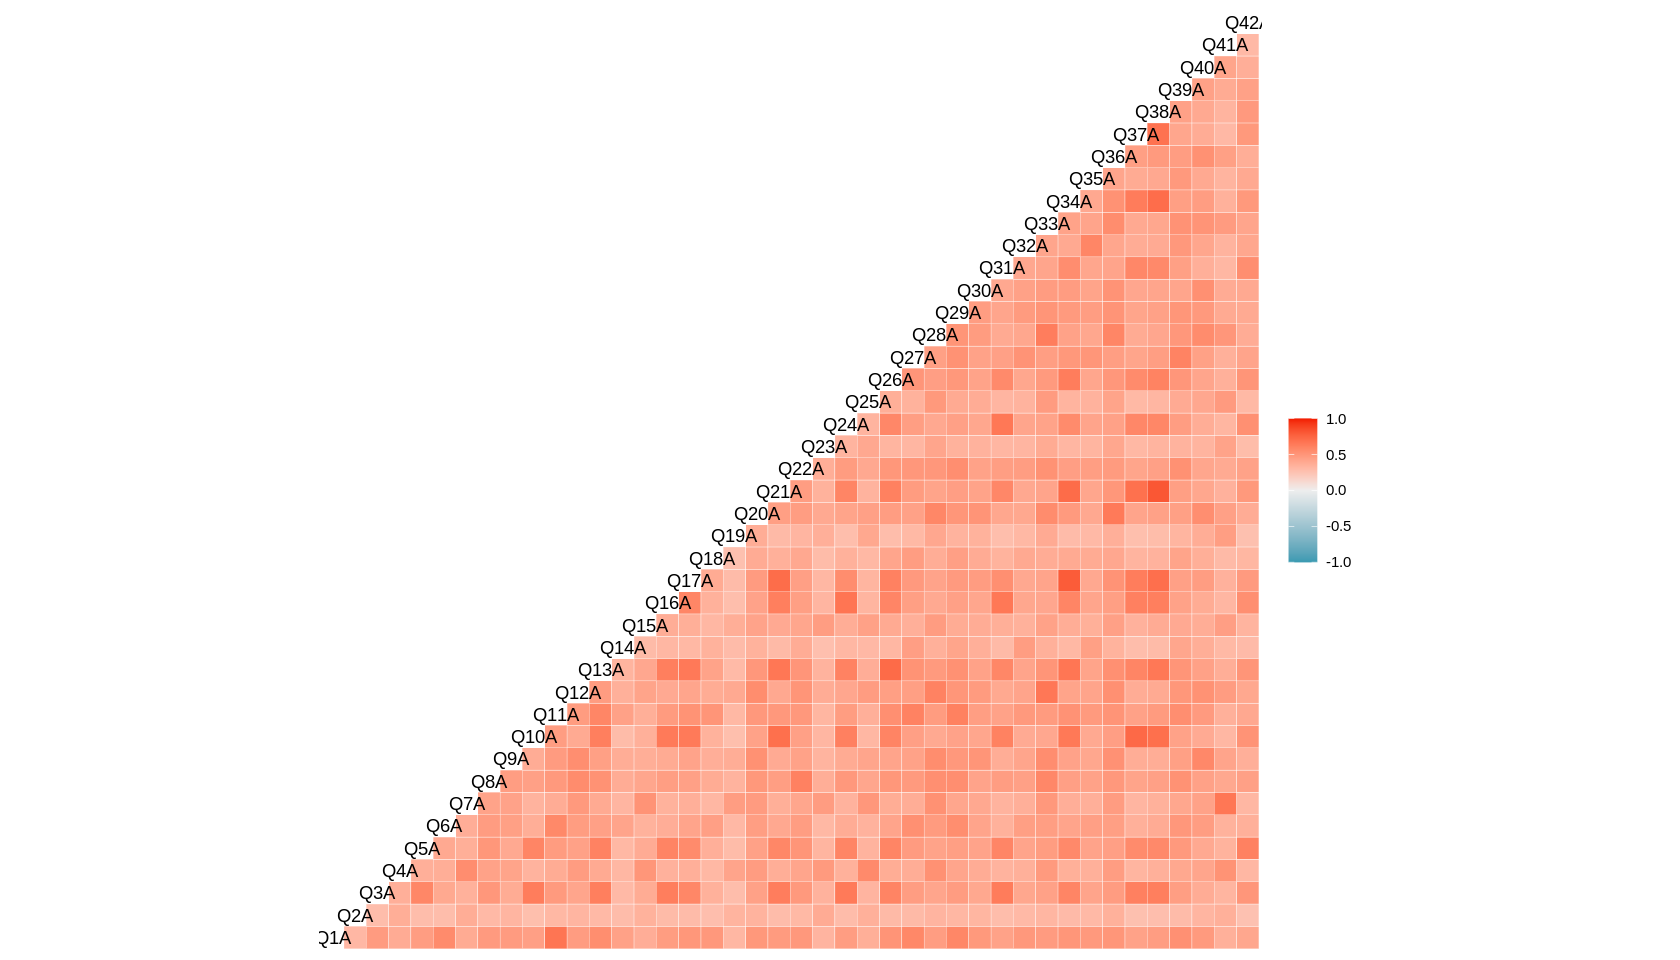

In [18]:
dass_selected_qs <- dass_selected %>%
    select(ends_with("A"))
ggcorr(dass_selected_qs)

From this figure, it is apparent that all question have some degree of positive correlation with each other. This is due to the each question being representative of a symptom of depression, anxiety, or stress, and all questions prompt the "positive" reponse on the scale of 1 to 4. In other words, all questions are phrased such that the participant is always prompted to respond with a higher number the more they experience depression, axiety, or stress. Because of this, we will create our target variable as the mean of the responses to all 42 questions for each participant. We achieve this by combining the mutate() and rowMeans() functions to create another column that encompasses the mean of responses to all questions.

In [40]:
# Creating our target variable (average of all Q responses), dropping the Q responses

dass_clean <- dass_selected %>% mutate(avg = rowMeans(select(dass_selected, starts_with("Q")))) %>% select(!starts_with("Q")) %>% filter(TIPI1 > 0 
                            & TIPI2 > 0 & TIPI3 > 0 & TIPI4 > 0 & TIPI5 > 0 & TIPI6 > 0 & TIPI7 > 0 & TIPI8 > 0 & TIPI9 > 0  & TIPI10 > 0 & age < 100)
names(dass_clean)

# Now we only have 28433 rows and 12 predictors and avg as our target variable

[1] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
 [7] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"      
[13] "avg"

In [41]:
head(dass_clean)

TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,age,avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,7,7,7,7,7,5,1,1,2,16,3.404762
6,5,4,7,5,4,7,7,1,5,2,16,2.619048
2,5,2,2,5,6,5,5,3,2,2,17,2.619048
1,1,7,4,6,4,6,1,6,1,1,13,2.166667
2,5,3,6,5,5,5,6,3,3,3,19,3.404762
2,1,6,1,7,7,7,2,6,7,2,20,1.738095


In [58]:
summary(dass_clean)

     TIPI1           TIPI2           TIPI3           TIPI4          TIPI5      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:4.000   1st Qu.:5.00   1st Qu.:4.000  
 Median :4.000   Median :5.000   Median :5.000   Median :6.00   Median :5.000  
 Mean   :3.832   Mean   :4.253   Mean   :4.814   Mean   :5.23   Mean   :5.001  
 3rd Qu.:5.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:7.00   3rd Qu.:6.000  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.00   Max.   :7.000  
     TIPI6           TIPI7           TIPI8           TIPI9      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:4.000   1st Qu.:5.000   1st Qu.:3.000   1st Qu.:2.000  
 Median :5.000   Median :6.000   Median :5.000   Median :4.000  
 Mean   :4.912   Mean   :5.353   Mean   :4.348   Mean   :3.687  
 3rd Qu.:6.000   3rd Qu.:7.000   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   M

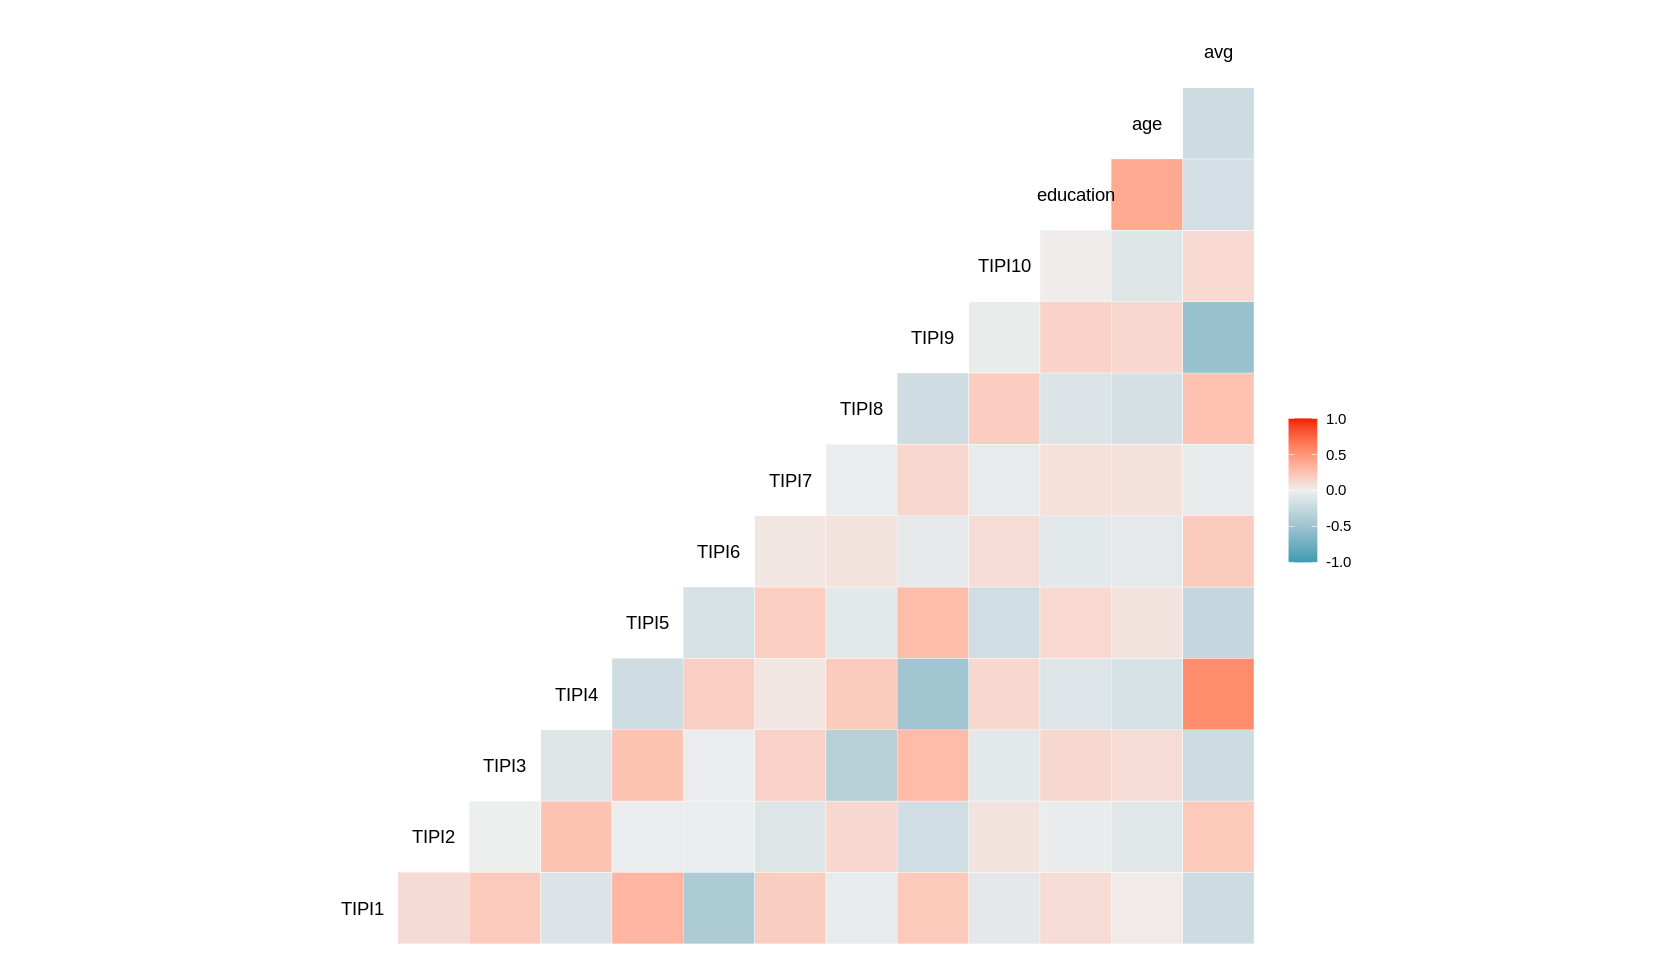

In [42]:
ggcorr(dass_clean)

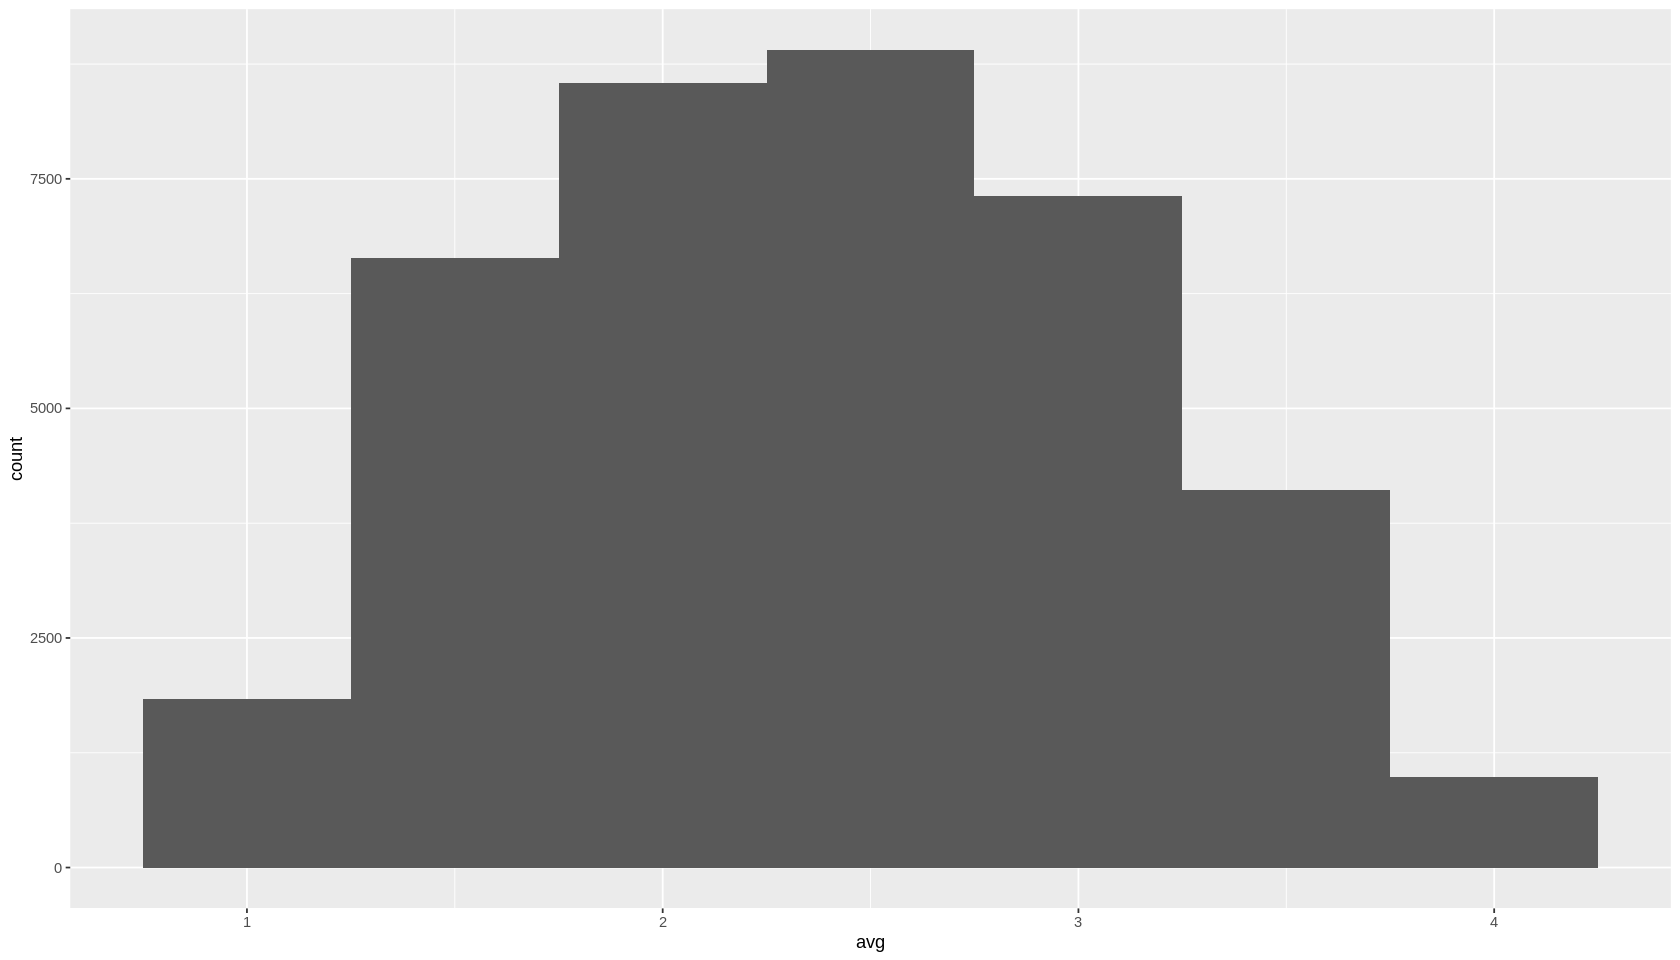

In [43]:
ggplot(dass_clean, aes(x=avg)) + geom_histogram(binwidth=0.5)

In [44]:
dass_pivot <- pivot_longer(dass_clean, cols = TIPI1:age, names_to = "Predictor", values_to = "Predictor_Value")

summary_table <- dass_pivot %>% 
    group_by(Predictor, Predictor_Value) %>% 
    summarize(mean = mean(avg), sd = sd(avg), n = n())


head(summary_table)

`summarise()` regrouping output by 'Predictor' (override with `.groups` argument)



Predictor,Predictor_Value,mean,sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
age,13,2.816031,0.7128079,472
age,14,2.779383,0.6860570,895
age,15,2.675780,0.7002093,1356
age,16,2.603237,0.6885614,2039
age,17,2.557070,0.6927629,2217
age,18,2.483539,0.7097076,2903


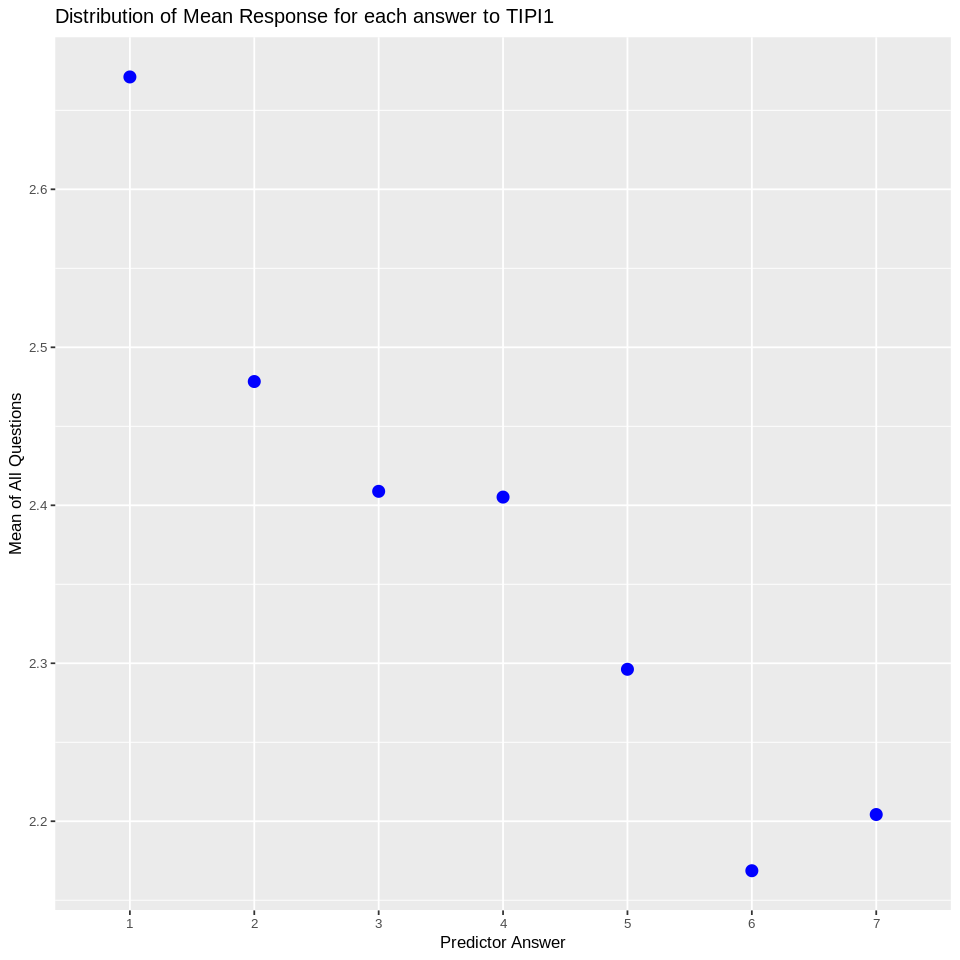

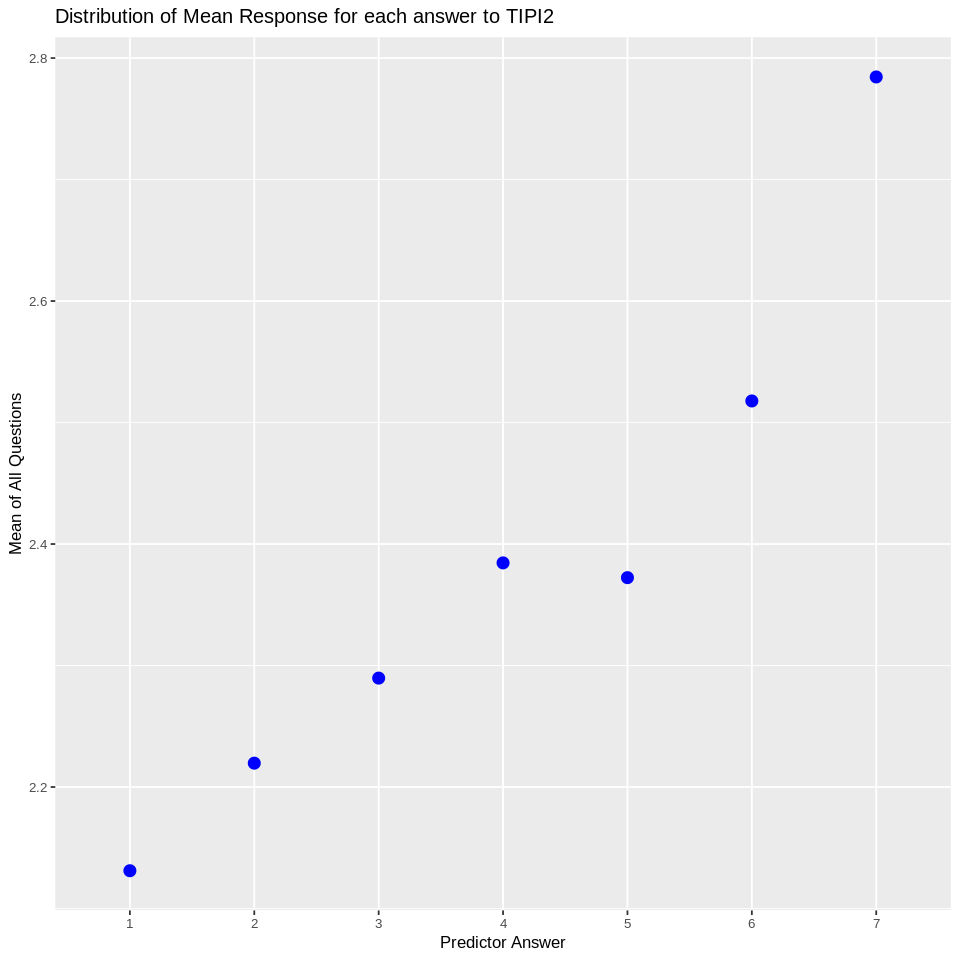

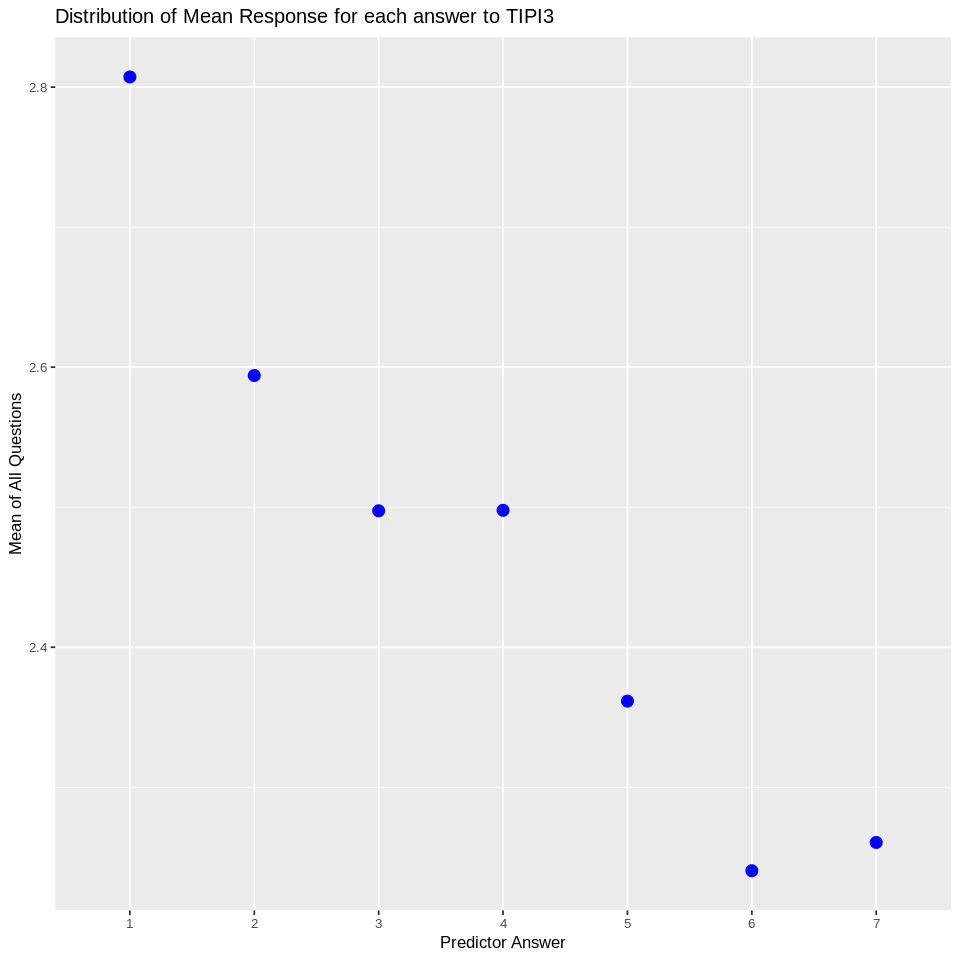

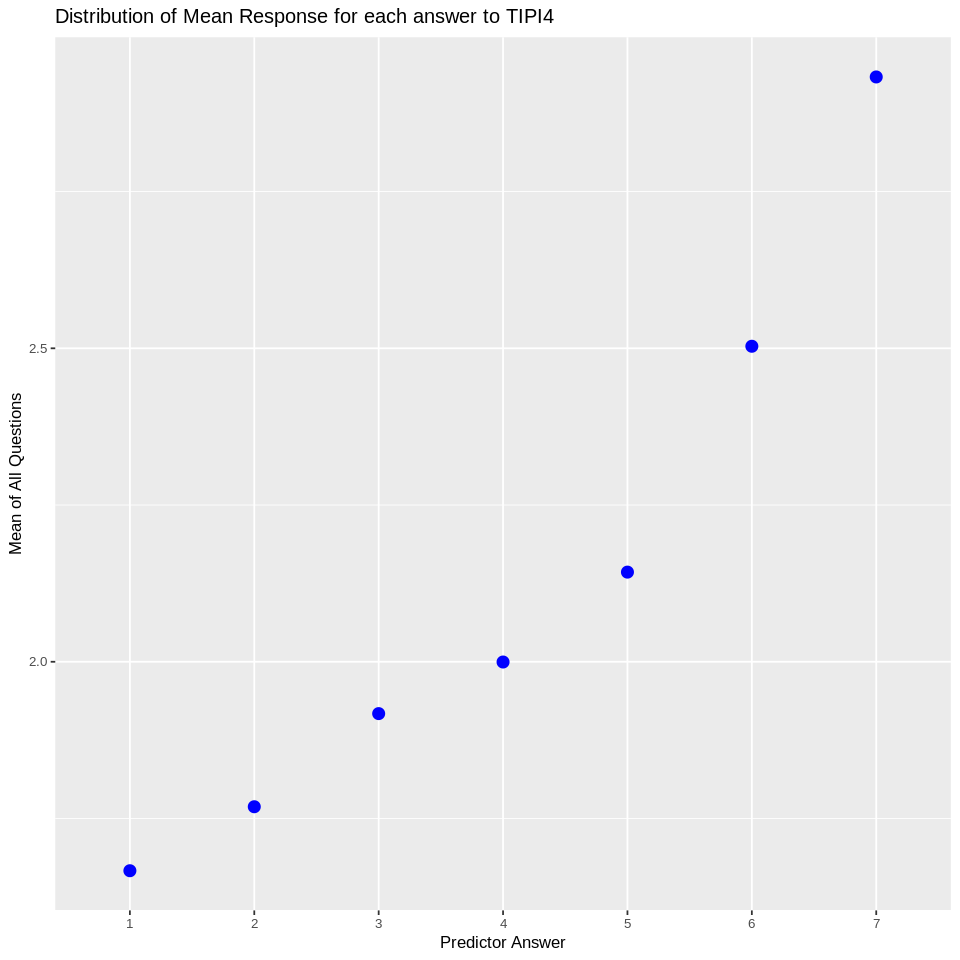

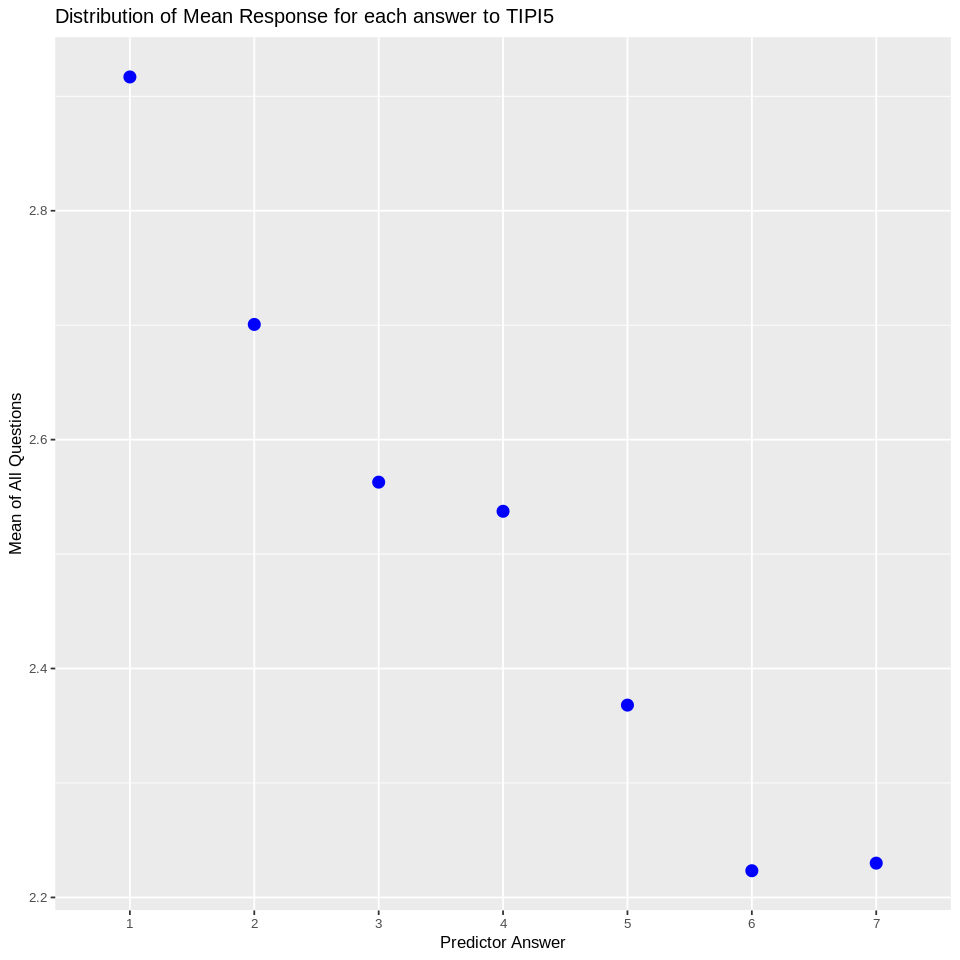

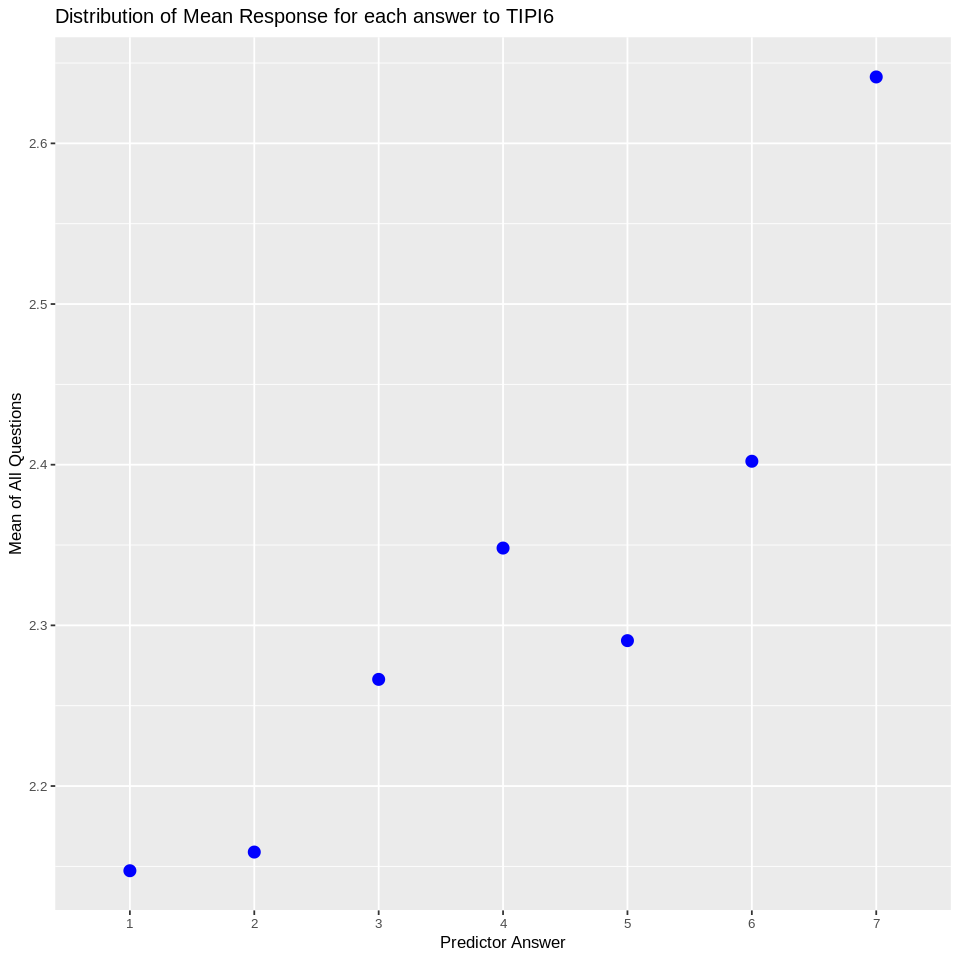

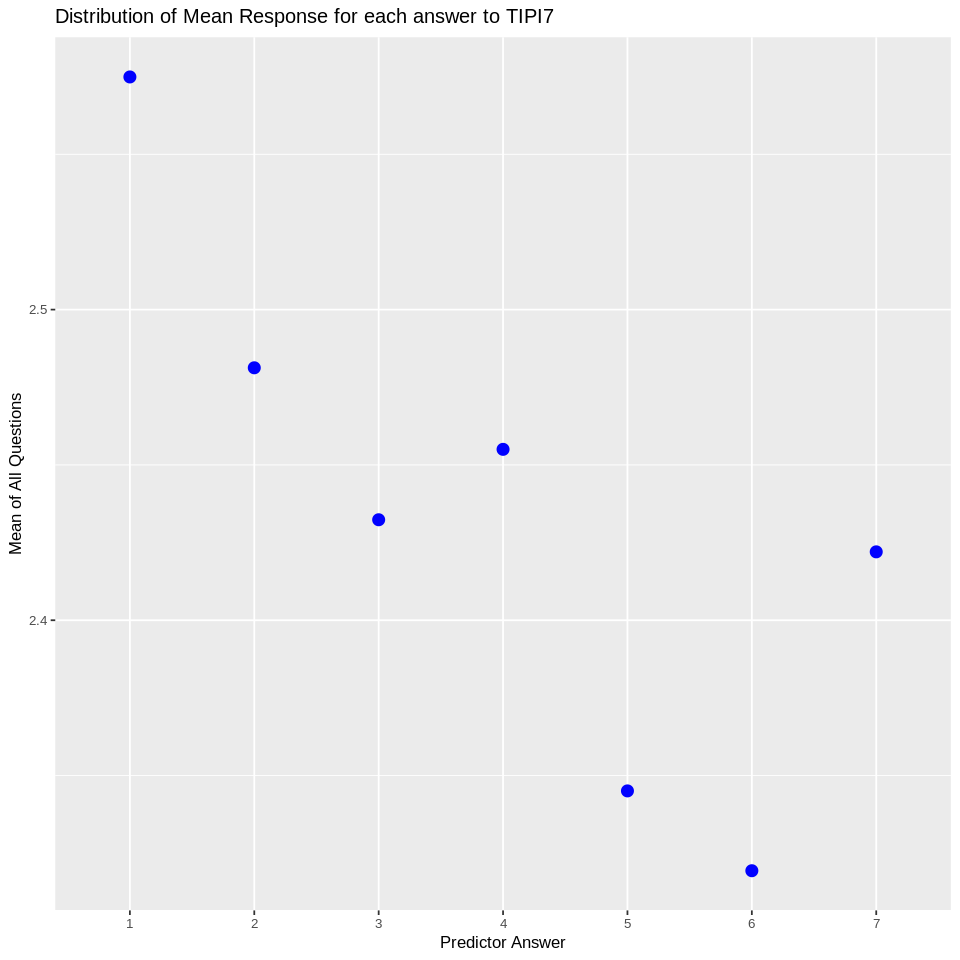

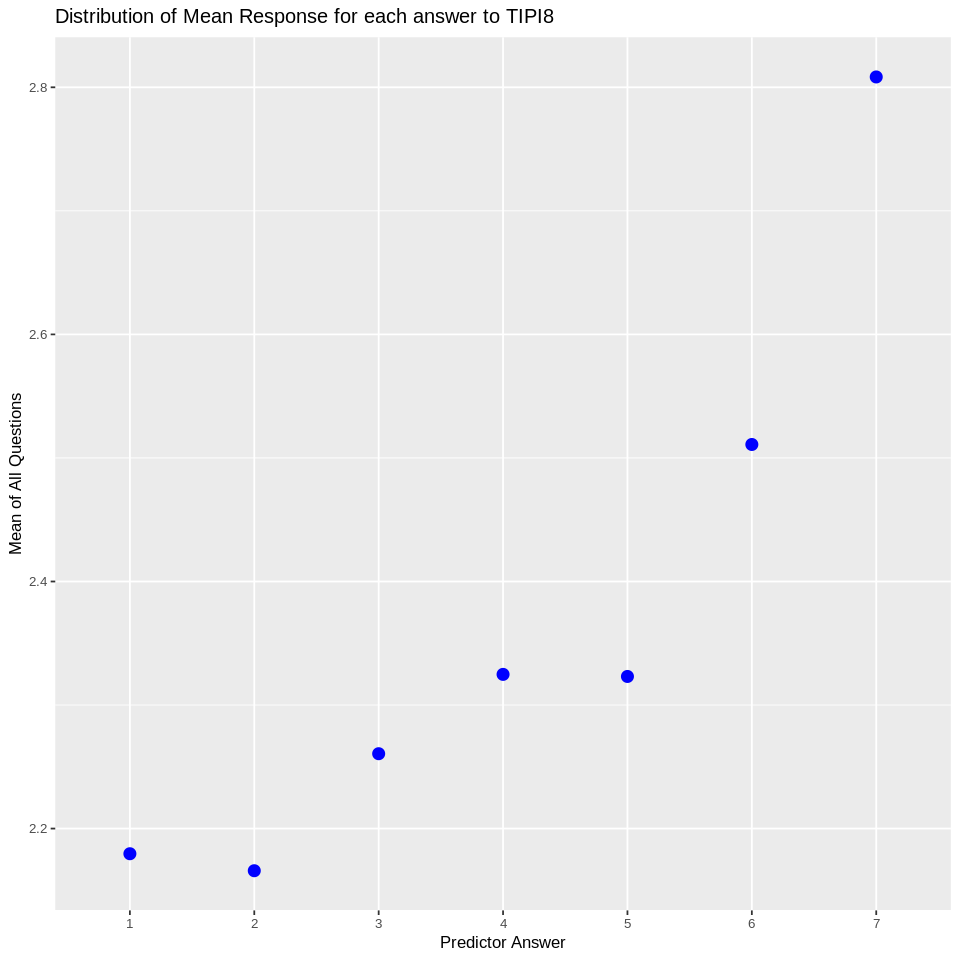

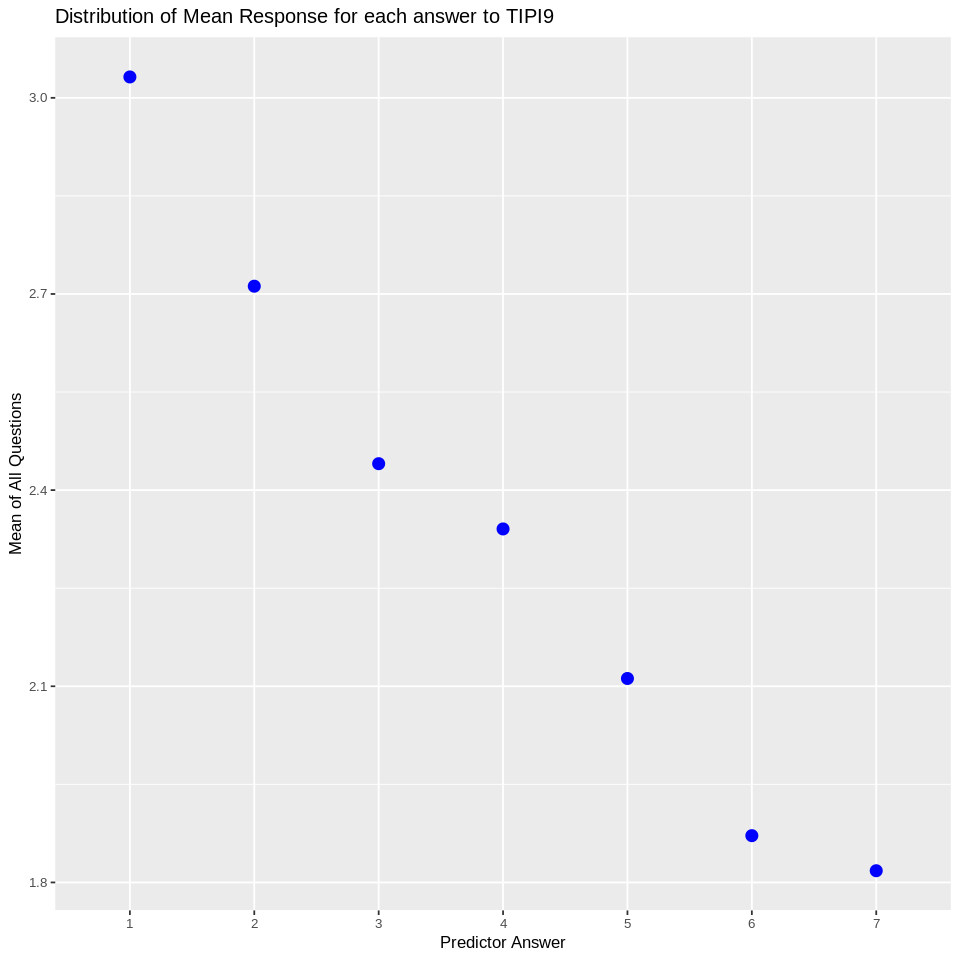

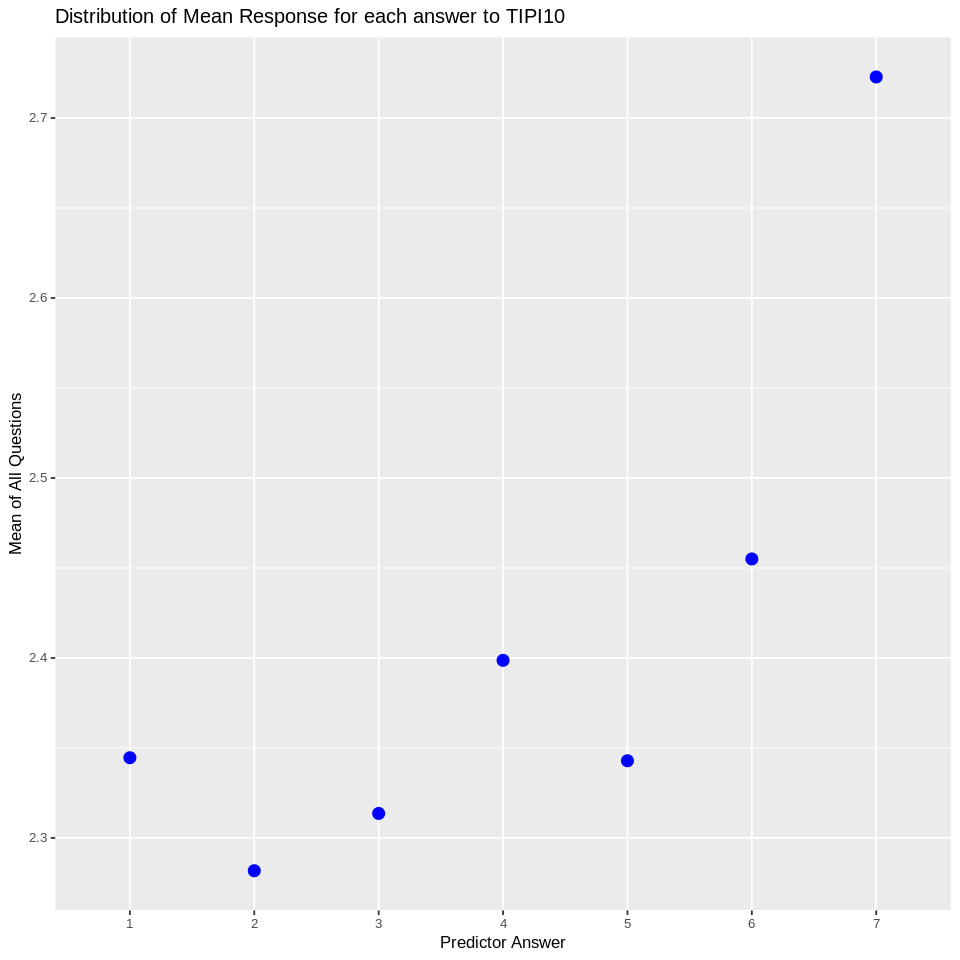

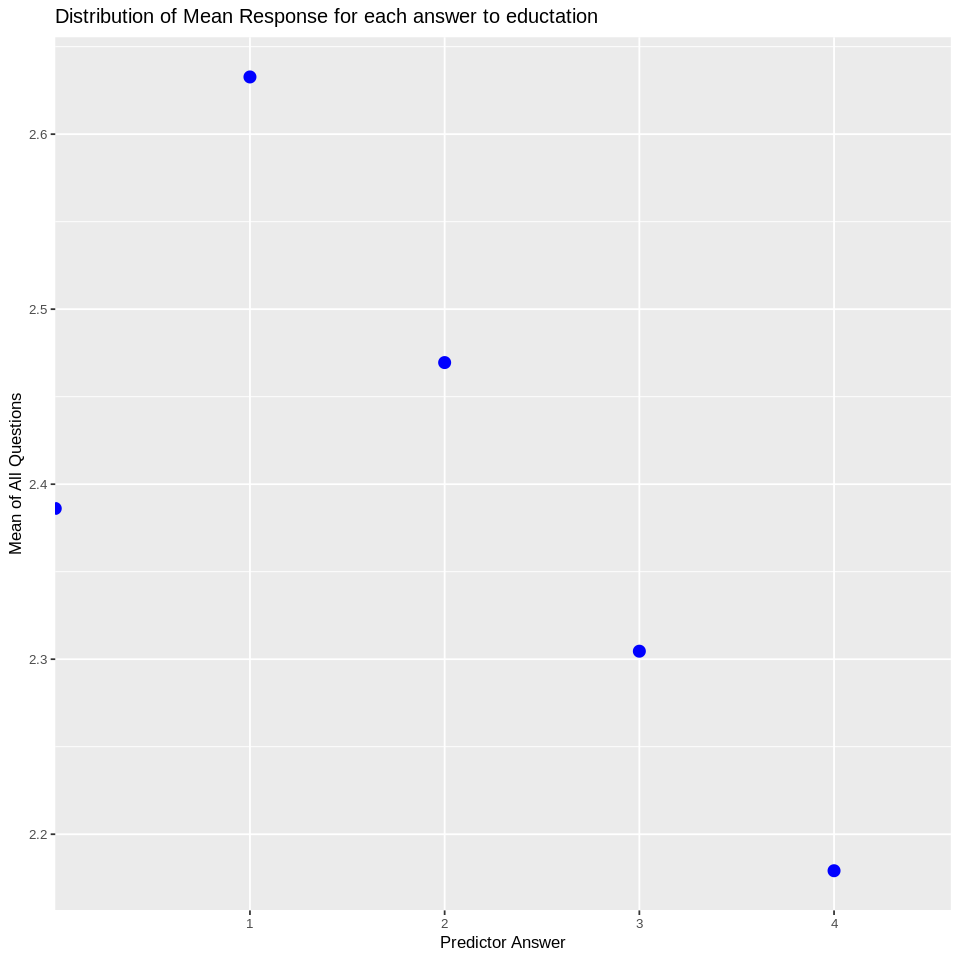

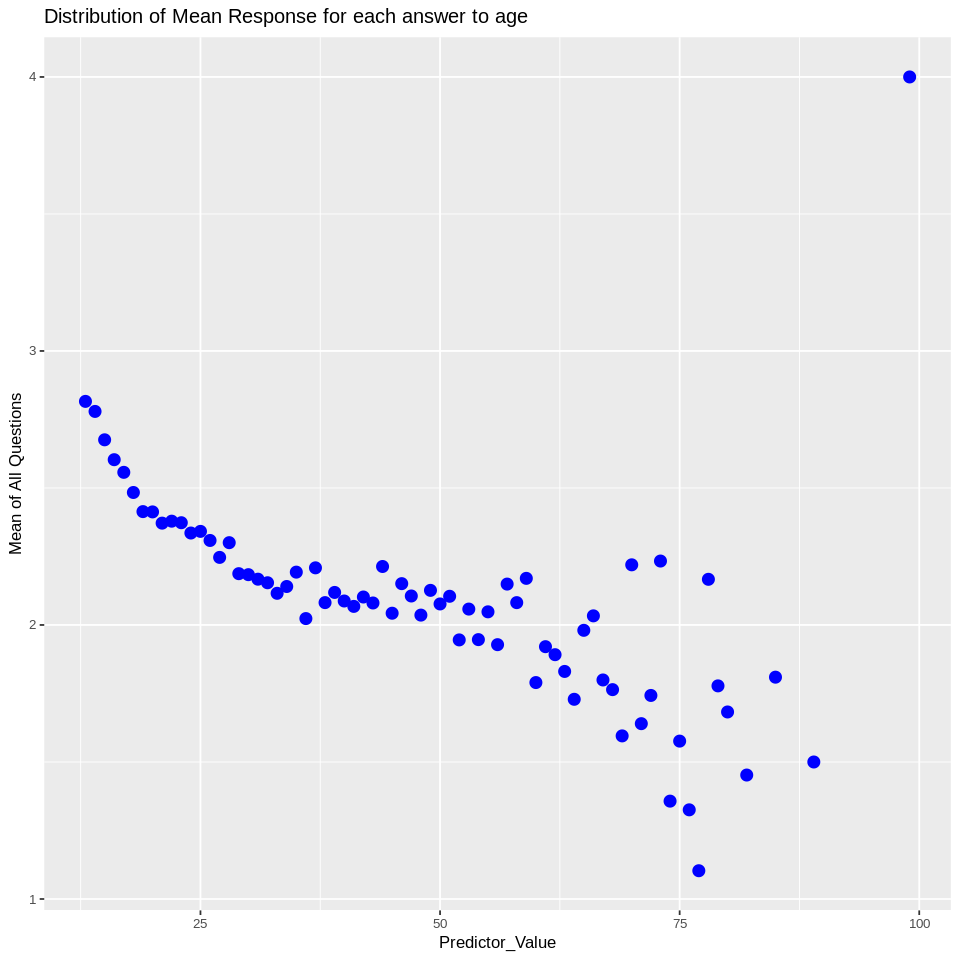

In [57]:
options(repr.plot.width=8, repr.plot.height=8)

predictor_vector <- c("TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10")

for (c in predictor_vector) {
    
    summary <- summary_table %>% filter(Predictor == c)
    
    predictor_dist <- ggplot(summary, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        scale_x_discrete(name ="Predictor Answer", limits=c("1","2","3","4","5","6","7")) +
                        theme(text = element_text(size = 10)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to", c))
    
    print(predictor_dist)
}

summary_edu <- summary_table %>% filter(Predictor == "education")

education_dist <- ggplot(summary_edu, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        scale_x_discrete(name ="Predictor Answer", limits=c("1","2","3","4")) +
                        theme(text = element_text(size = 10)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to eductation"))

summary_age <- summary_table %>% filter(Predictor == "age")

age_dist <- ggplot(summary_age, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        theme(text = element_text(size = 10)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to age"))

education_dist

age_dist

In [48]:
# Splitting the Data
dass_split <- initial_split(dass_clean, prop = 0.75, strata = avg)  
dass_train <- training(dass_split)   
dass_test <- testing(dass_split)

In [ ]:
# knn regression
# Takes a VERY LONG time to run
set.seed(1234)

dass_recipe <- recipe(avg ~ ., data = dass_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

dass_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

dass_workflow <- workflow() %>%
    add_recipe(dass_recipe) %>%
    add_model(dass_spec_tune)

dass_vfold <- vfold_cv(dass_train, v = 2, strata = avg)

gridvals <- tibble(neighbors = seq(from = 1, to = 500, by = 100))

dass_results <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals) %>%
                    collect_metrics()



In [14]:
dass_min <- dass_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
101,rmse,standard,0.5446243,2,0.002835041,Model2


In [15]:
dass_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.7436641,2,0.005185037,Model1
1,rsq,standard,0.2030227,2,0.008463013,Model1
101,rmse,standard,0.5446243,2,0.002835041,Model2
101,rsq,standard,0.4329791,2,0.011840405,Model2
201,rmse,standard,0.5481594,2,0.002458280,Model3
201,rsq,standard,0.4318655,2,0.011559698,Model3
301,rmse,standard,0.5508314,2,0.002254059,Model4
301,rsq,standard,0.4311650,2,0.011553472,Model4
401,rmse,standard,0.5530555,2,0.002051710,Model5


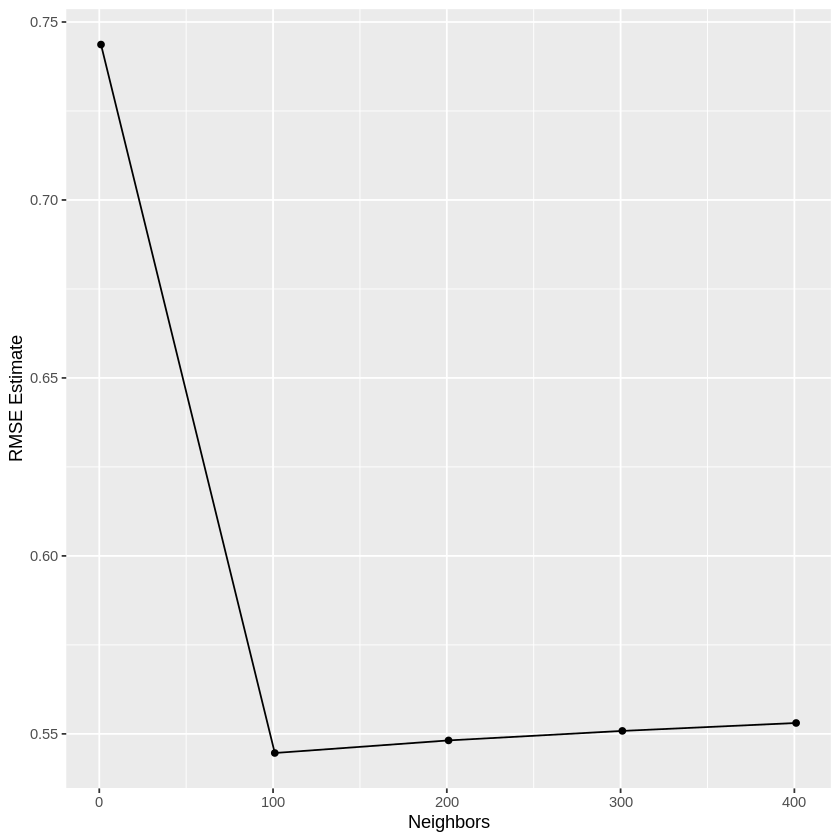

In [16]:
rmse_tune <- dass_results %>% 
      filter(.metric == "rmse")

rmse_versus_k <- ggplot(rmse_tune, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k

In [17]:
#Further turning of the knn model
gridvals_200 <- tibble(neighbors = seq(from = 1, to = 200, by = 10))

dass_results_200 <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals_200) %>%
                    collect_metrics()

In [18]:
dass_min_final <- dass_results_200 %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min_final
# lets choose neighbors = 41 (we can tune further if we want but this should be good enough)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,0.5419039,2,0.003565784,Model05


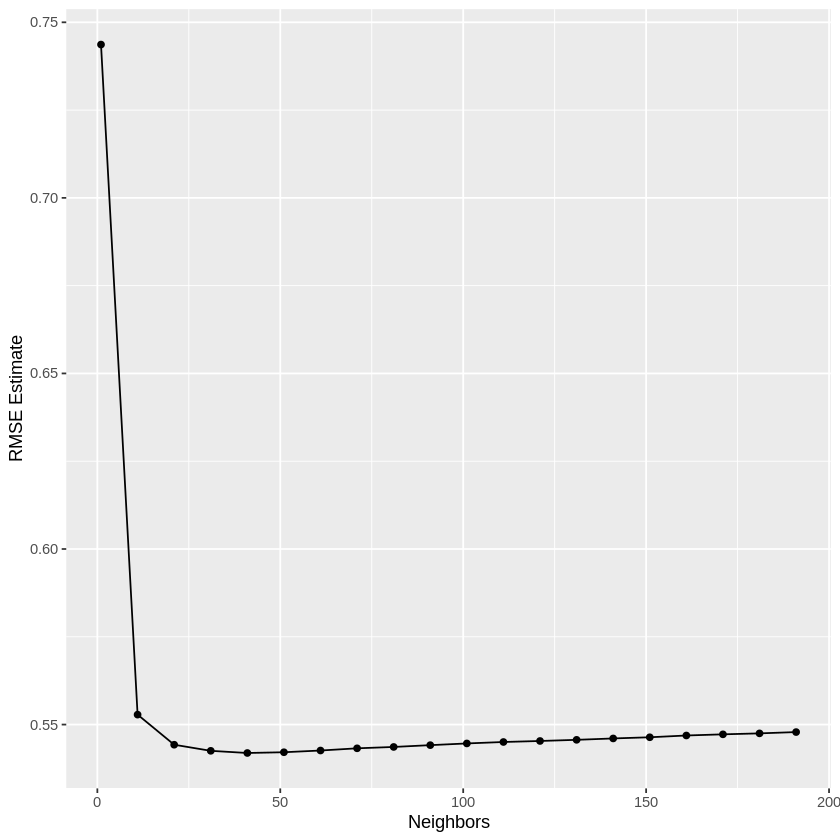

In [19]:
rmse_tune_final <- dass_results_200 %>% 
      filter(.metric == "rmse")

rmse_versus_k_final <- ggplot(rmse_tune_final, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k_final

In [20]:
# Final Knn Model
set.seed(1234)

k_min <- dass_min_final %>%
         pull("neighbors") %>% as.integer()

dass_final_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

dass_best_knn_fit <- workflow() %>%
         add_recipe(dass_recipe) %>%
         add_model(dass_final_knn) %>%
         fit(data = dass_train)

dass_summary <- dass_best_knn_fit %>%
          predict(dass_test) %>%
          bind_cols(dass_test) %>%
          metrics(truth = avg, estimate = .pred)

# your code here
dass_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5338841
rsq,standard,0.4538549
mae,standard,0.4302408


In [60]:
# linear regression
lm_spec <- linear_reg() %>%
            set_engine("lm") %>%
            set_mode("regression")

lm_recipe <- recipe(avg ~ ., data = dass_train)

lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = dass_train)

lm_test_results <- lm_fit %>%
  predict(dass_test) %>%
  bind_cols(dass_test) %>%
  metrics(truth = avg, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5259161
rsq,standard,0.4507091
mae,standard,0.4191784


In [61]:
coeffs <- lm_fit %>%
             pull_workflow_fit() %>%
             tidy()

coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.034172081,0.0272494225,74.650099,0.000000e+00
TIPI1,-0.023423994,0.0020296331,-11.540999,9.582069e-31
TIPI2,0.026872293,0.0019137058,14.042019,1.211457e-44
TIPI3,-0.008300108,0.0020936234,-3.964471,7.373694e-05
TIPI4,0.137899101,0.0022047373,62.546727,0.000000e+00
TIPI5,-0.022657165,0.0021766133,-10.409366,2.492784e-25
TIPI6,0.031703198,0.0019413004,16.330908,1.105427e-59
TIPI7,0.010863963,0.0022422641,4.845086,1.272157e-06
TIPI8,0.031872750,0.0018479230,17.247878,2.506485e-66


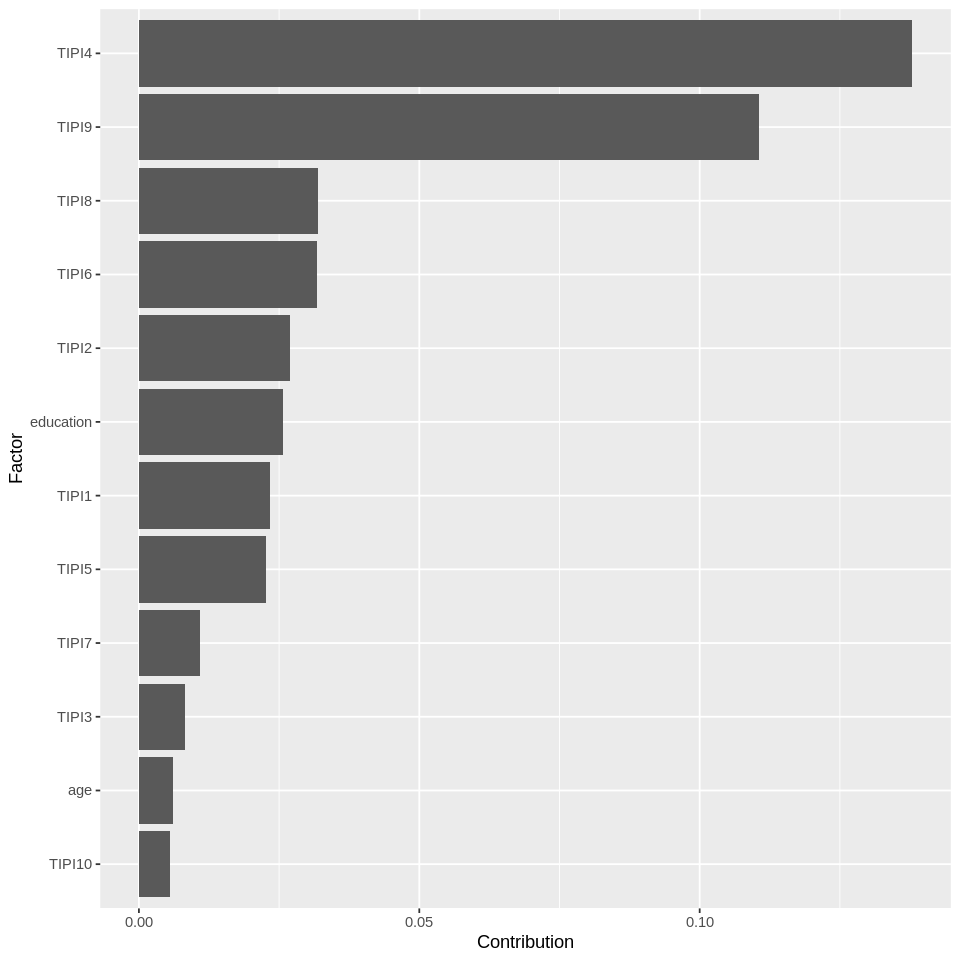

In [69]:
coeffs$abs_est = abs(coeffs$estimate)

coeffs_new = coeffs[-1,]

count_bar_chart <- ggplot(coeffs_new, aes(x = reorder(term, abs_est), y = abs_est)) + 
                    geom_bar(stat = "identity") +
                    xlab("Factor") +
                    ylab("Contribution")

count_bar_chart_B <- count_bar_chart + 
                        coord_flip()
count_bar_chart_B